In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv', usecols = ['habitaciones', 'metrostotales', 'precio'])#,'habitaciones', 'metrostotales', 'garages', 'precio'] )

In [3]:
df['habitaciones'] = df['habitaciones'].fillna(0)
df = df.dropna().head(100)
df['grupo_metrostotales'] = pd.cut(df['metrostotales'], [0, 75, 200, 350, 500])
df['grupo_metrostotales'] = df['grupo_metrostotales'].transform(str)
df

,habitaciones,metrostotales,precio,grupo_metrostotales
0,2.0,80.0,2273000.0,"(75, 200]"
1,3.0,180.0,3600000.0,"(75, 200]"
2,3.0,166.0,1200000.0,"(75, 200]"
3,2.0,67.0,650000.0,"(0, 75]"
4,2.0,95.0,1150000.0,"(75, 200]"
...,...,...,...,...
118,2.0,120.0,2500000.0,"(75, 200]"
119,3.0,140.0,1100000.0,"(75, 200]"
120,3.0,85.0,990000.0,"(75, 200]"
121,3.0,220.0,2390000.0,"(200, 350]"


c:\users\juani\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


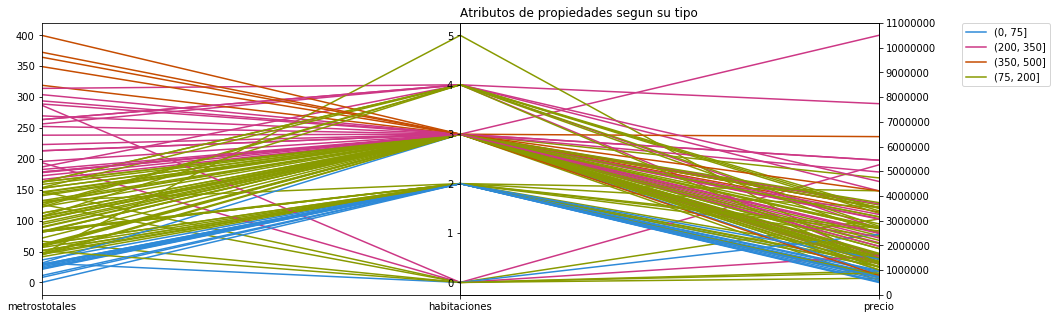

In [4]:
DIVISION_PRECIO = 1000000

COLORES = ['#2e8ad8', '#cd3785', '#c64c00', '#889a00'] # Debe ser igual a la cantidad de valores unicos de la columna a representar del df

def crear_labels_parallel(df, categoria, columnas):
    labels = {}
    nuevo_df = pd.DataFrame()
    nuevo_df[categoria] = df[categoria]
    for col in columnas:
        if col == 'metroscubiertos' or col == 'metrostotales':
            labels[col] = [int(round(x-df[col].min())) for x in range(int(df[col].min()), int(df[col].max()+50), 50)]
        elif col == 'precio':
            labels[col] = [int(x-df[col].min()) for x in range(int(df[col].min()), int(df[col].max()+DIVISION_PRECIO), DIVISION_PRECIO)]
        else:
            labels[col] = [x for x in range(int(df[col].min()), int(df[col].max()+1), 1)]
        nuevo_df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))
    return nuevo_df, labels

def generar_ultimo_axis(ax, labels_y, ticks, labels_x, x):
    new_ax = plt.twinx(ax)
    new_ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
    new_ax.yaxis.set_ticks([x/(len(labels_y)-1) for x in range(len(labels_y))])
    new_ax.set_yticklabels(labels_y)
    new_ax.set_xticklabels([labels_x[-2], labels_x[-1]])

    
def set_ticks(ax, labels_y, ticks, posicion_x, label_x):
    ax.xaxis.set_major_locator(ticker.FixedLocator([posicion_x]))
    ax.yaxis.set_ticks([x/(len(labels_y)-1) for x in range(len(labels_y))])
    ax.set_yticklabels(labels_y)
    ax.set_xticklabels([label_x])   
    
def crear_parallel(df,categoria, tipos = []):
    '''Recibe un dataframe y una categoria base para crear un parallel graph de las columnas del dataframe
    colores es un diccionario tipo:color'''
    tipos = sorted(list(df[categoria].dropna().unique()))
    x = [i for i in range(len(columnas))]
    colores = {tipos[i]: color for i, color in enumerate(COLORES)}
    
    df_escalado, labels = crear_labels_parallel(df, categoria, columnas)
    figura, axes = plt.subplots(1,len(labels)-1, sharey=False, figsize=(15,5))   
    
    for i, ax in enumerate(axes):
        for indice in df_escalado.index:
            tipo = df_escalado.loc[indice, categoria]
            ax.plot(x, df_escalado.loc[indice, columnas], colores[tipo])
        ax.set_xlim(i, i+1)
    
    for i, categoria in enumerate(labels):
        if i == len(axes):
            generar_ultimo_axis(axes[-1], labels[categoria], list(df[categoria].unique()), columnas, x)
            break
        set_ticks(axes[i], labels[categoria], list(df[categoria].unique()), i, columnas[i])
    
    plt.legend(
    [plt.Line2D((0,1),(0,0), color=colores[tipo]) for tipo in tipos], tipos, bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
    plt.subplots_adjust(wspace=0)
    return

    
columnas = list(df.columns)
columnas.remove('grupo_metrostotales')
columnas[0], columnas[1] = columnas[1], columnas[0]
crear_parallel(df, 'grupo_metrostotales')
plt.title('Atributos de propiedades segun su tipo', loc='left')
plt.savefig('owo.jpg')
plt.show()